### Логистическая регрессия. Практика.

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model


import warnings # для игнорирования предупреждений
#Игнорируем предупреждения
warnings.filterwarnings('ignore')


# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [2]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()
df = diabetes_data.copy()

In [3]:
df.shape # размер таблицы

(757, 8)

<Axes: >

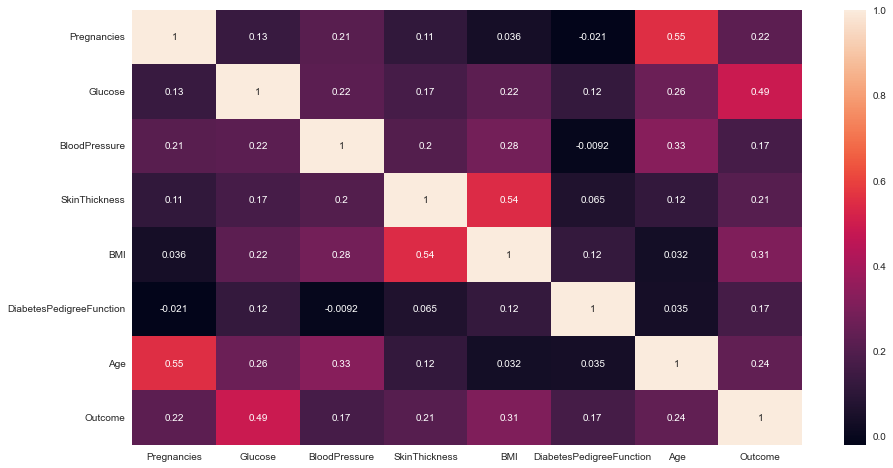

In [4]:
# тепловая карта корреляции
fig, ax = plt.subplots(figsize = (15, 8))
sns.heatmap(df.corr(), annot=True)

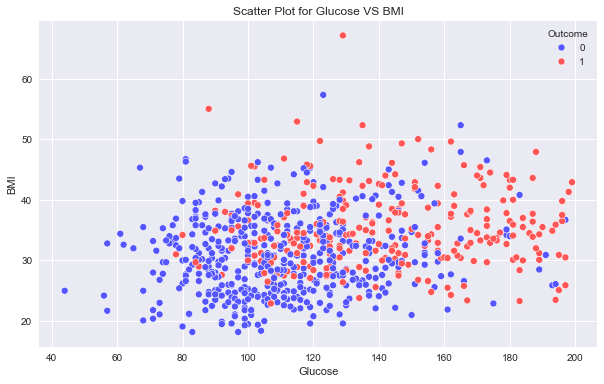

In [5]:
# диаграмма рессеяния Уровень глюкозы к Индексу массы тела
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=df, # дата-сет
    x='Glucose', # ось Х
    y='BMI', # ось Y
    hue='Outcome', # по какому признаку группировка
    palette='seismic', # палитра
    ax=ax # координатная плоскость
)
ax.set_title('Scatter Plot for Glucose VS BMI'); # наименование графика

Разделяем выборку на матрицу наблюдений $X$, состоящую из двух признаков, и столбец с правильным ответами $y$

In [6]:
X = df[['Glucose', 'BMI']]
y = df['Outcome']

In [7]:
# создаем объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)

# обучаем модель, минимизируем logloss
log_reg_2d.fit(X, y)

print(f'w0: {log_reg_2d.intercept_}') # коеффициент W0
print(f'w1, w2: {log_reg_2d.coef_}') # коеффициенты W1 и W2

w0: [-8.24898965]
w1, w2: [[0.03779275 0.0875742 ]]


Метод $predict$ _ $proba$ возвращает значение вероятности (%) пренадлежности к классам 0 и 1

In [8]:
#Загрузим значения концентрации глюкозы и индекса массы тела для пациента
X_new = pd.DataFrame({'Glucose': [180], 'BMI': [51]})
#Делаем предсказание вероятностей:
y_new_predict_proba = log_reg_2d.predict_proba(X_new)
print(f'Predicted probabilities:{np.round(y_new_predict_proba, 2)}')

# вероятность отнесения объекта к классу 0 равна 5%
# вероятность отнесения объекта к классу 1 равна 95%
# сумма вероятностей всегда равна 1
# с вероятностью 95% пациент болеет диабетом

Predicted probabilities:[[0.05 0.95]]


Метод $predict$ возвращает пренадлежность к классу 0 или 1

In [11]:
#Загрузим значения концентрации глюкозы и индекса массы тела для пациента
X_new_pred = pd.DataFrame({'Glucose': [180], 'BMI': [51]})
#Делаем предсказание вероятностей:
y_new_predict = log_reg_2d.predict(X_new_pred)
print(f'Predicted probabilities:{y_new_predict}')

# функция вернула значение 1 - значит функция предсказания показывает, что пациент с данными признаками болен диабетом

Predicted probabilities:[1]


Визулизируем модель через созданную функцию plot_probabilities_2d()<br>
Данная функция принимает три аргумента:
- X — матрица с наблюдениями,
- y — столбец с правильными ответами,
- model — модель, с помощью которой делается предсказание вероятностей

In [14]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (15, 8))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

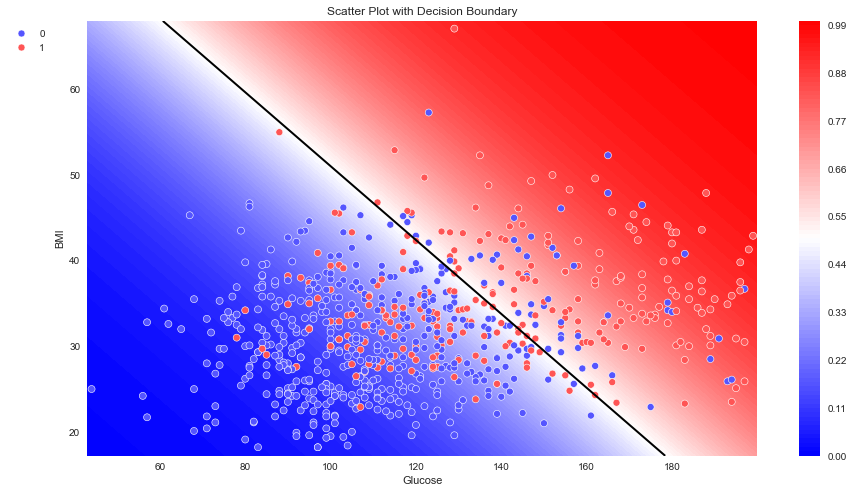

In [16]:
# визуализация модели на двух признаках Glucose & BMI
plot_probabilities_2d(X, y, log_reg_2d)

### Создадим модель, используя все признаки датасета

In [17]:
#Создаём матрицу признаков X и столбец с вектором правильных ответов y
X_full = df.drop('Outcome', axis=1)
y_full = df['Outcome']

In [20]:
#Создаём объект класса LogisticRegression
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минимизируя logloss
log_reg_full.fit(X_full, y_full)
#Делаем предсказание класса методом predict
y_pred_full = log_reg_full.predict(X_full)

Добавим предсказание в таблицу X

In [22]:
#Создадим временную таблицу X_full_temp
X_full_temp = X_full.copy()
#Добавим в эту таблицу результат предсказания
X_full_temp['Prediction'] = y_pred_full
X_full_temp.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Prediction
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0
